# One-Dimensional Kernel Smoothers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

Text(0.5, 0, '$x_0$')

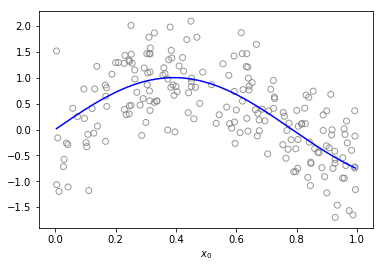

In [2]:
x = np.random.uniform(0, 1, 200)
x.sort()
e = np.random.normal(0, (1/3)**0.5, 200)
y = list(map(lambda x, e:math.sin(4*x) + e, x, e))
y_truth = list(map(lambda x:math.sin(4*x), x))

plt.scatter(x, y, facecolors='none', edgecolors='grey', alpha=0.8)
plt.plot(x, y_truth, 'b')
plt.xlabel('$x_0$')

In [3]:
def knn(trainx, trainy, testx, k=30):
    def _knn(x0):
        diff = abs(trainx - x0)
        index = np.argsort(diff)
        nny = [trainy[i] for i in index[:k]]
        return np.mean(nny)
    return [_knn(x0) for x0 in testx]
x_pre = np.linspace(0, 1, 100)
y_pre  = knn(x,y, x_pre, 30)

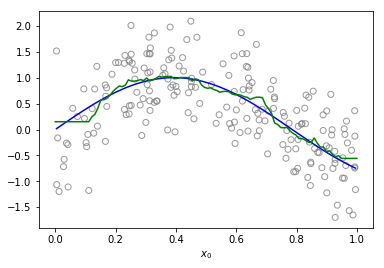

In [4]:
plt.scatter(x, y, facecolors='none', edgecolors='grey', alpha=0.8)
plt.plot(x, y_truth, 'b')
plt.xlabel('$x_0$')
plt.plot(x_pre, y_pre, 'g')

In [10]:
def eqk(x1, x2, l=0.2):
    return D(abs(x1 - x2)/l)
def D(t):
    return 3/4*(1-t**2) if abs(t)<=1 else 0
def knn_smooth(trainx, trainy, textx, k=30):
    def _knn(x0):
        diff = abs(trainx - x0)
        index = np.argsort(diff)
        m = [eqk(x0, trainx[i])*trainy[i] for i in index[:k]]
        n = [eqk(x0, trainx[i]) for i in index[:k]]
        return np.sum(m)/np.sum(n)
    return [_knn(x0) for x0 in textx]
y_pre_s  = knn_smooth(x,y, x_pre, 20)

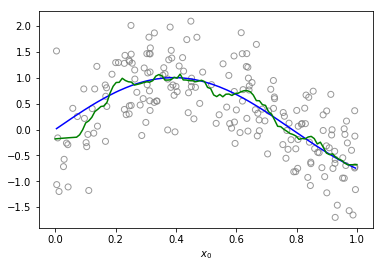

In [11]:
plt.scatter(x, y, facecolors='none', edgecolors='grey', alpha=0.8)
plt.plot(x, y_truth, 'b')
plt.xlabel('$x_0$')
plt.plot(x_pre, y_pre_s, 'g')